### Libraries


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Importing Data


In [ ]:
df = pd.read_csv("Superstore.csv")

### Exploring Data


In [ ]:
df.head()

In [ ]:
df.tail()

In [ ]:
df.describe()

In [ ]:
df.info()

In [ ]:
df.dtypes

### Cleaning Data


Renaming Columns


In [ ]:
# Rename columns
df.rename(
    columns={
        "Row ID": "row_id",
        "Order ID": "order_id",
        "Order Date": "order_date",
        "Ship Date": "ship_date",
        "Ship Mode": "ship_mode",
        "Customer ID": "customer_id",
        "Customer Name": "customer_name",
        "Segment": "segment",
        "Country": "country",
        "City": "city",
        "State": "state",
        "Postal Code": "postal_code",
        "Region": "region",
        "Product ID": "product_id",
        "Category": "category",
        "Sub-Category": "sub_category",
        "Product Name": "product_name",
        "Sales": "sales",
        "Quantity": "quantity",
        "Discount": "discount",
        "Profit": "profit",
    },
    inplace=True,
)

As memory usage of data is huge need to reduce size by handle Data types of some columns


In [ ]:
# Take a copy of data to prevent loss of any data
super_store = df.copy()

In [ ]:
# Ensure Copy is the same
super_store.info()

Identify Each type category to reduce memory usage


In [ ]:
# Identify columns has Data type --> int
ints = ["row_id", "postal_code", "quantity"]
# Identify columns has Data type --> float
floats = ["sales", "discount", "profit"]
# the rest of columns has Data type --> object

In [ ]:
for col in super_store.select_dtypes("object").columns:
    print(super_store[col].value_counts(), "\n")

In [ ]:
objects = ["order_id", "customer_id", "customer_name", "product_id", "product_name"]
dates = ["order_date", "ship_date"]

In [ ]:
# Change data type of some columns that less in memory usage
for col in super_store.columns:
    if col in ints:
        super_store[col] = super_store[col].astype("int32")
    elif col in floats:
        super_store[col] = super_store[col].astype("float16")
    elif col in objects:
        continue
    elif col in dates:
        super_store[col] = pd.to_datetime(super_store[col], format="mixed")
    else:
        super_store[col] = super_store[col].astype("category")

In [ ]:
# Investigate After Changing
super_store.info()

Memory usage has reduced by 49%


### Visualization to Investigate Meaningful Insights


How Total Number Of Orders Change Over Time


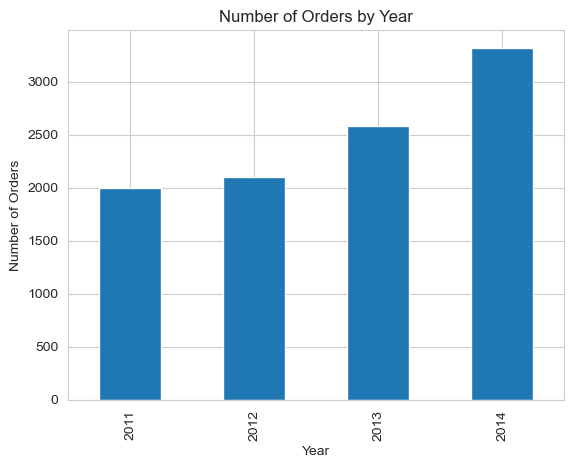

In [70]:
super_store["order_date"].dt.year.value_counts().sort_index().plot(kind="bar")
plt.xlabel("Year")
plt.ylabel("Number of Orders")
plt.title("Number of Orders by Year")
plt.show()

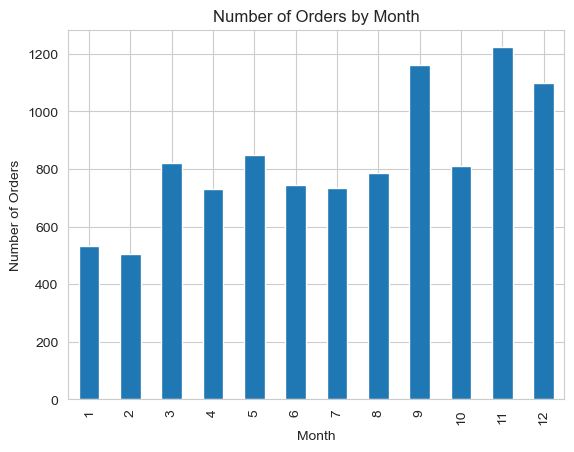

In [71]:
super_store["order_date"].dt.month.value_counts().sort_index().plot(kind="bar")
plt.xlabel("Month")
plt.ylabel("Number of Orders")
plt.title("Number of Orders by Month")
plt.show()

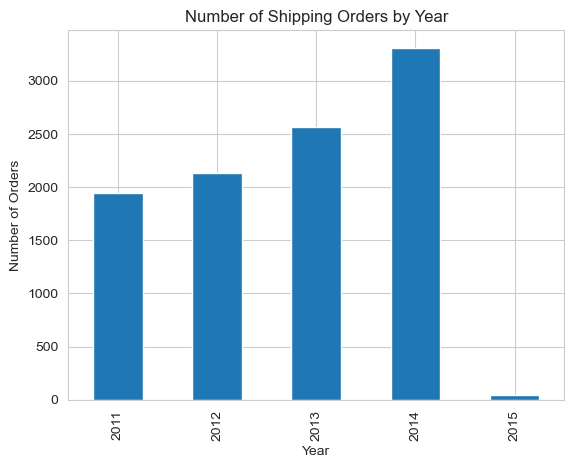

In [72]:
super_store["ship_date"].dt.year.value_counts().sort_index().plot(kind="bar")
plt.xlabel("Year")
plt.ylabel("Number of Orders")
plt.title("Number of Shipping Orders by Year")
plt.show()

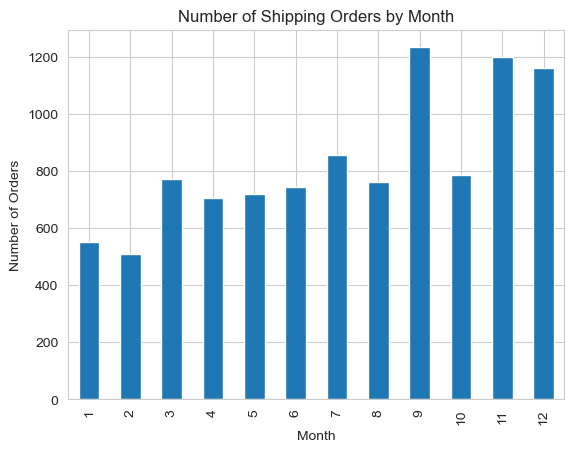

In [73]:
super_store["ship_date"].dt.month.value_counts().sort_index().plot(kind="bar")
plt.xlabel("Month")
plt.ylabel("Number of Orders")
plt.title("Number of Shipping Orders by Month")
plt.show()

Total Sales & Profits Over Years


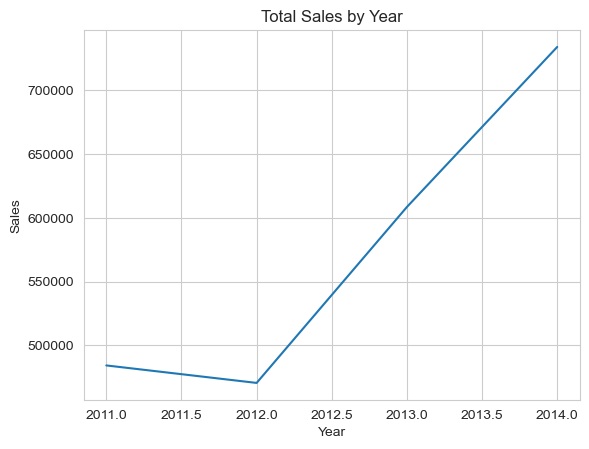

In [77]:
super_store["order_year"] = super_store["order_date"].dt.year
super_store.groupby("order_year")["sales"].sum().plot()
plt.xlabel("Year")
plt.ylabel("Sales")
plt.title("Total Sales by Year")
plt.show()

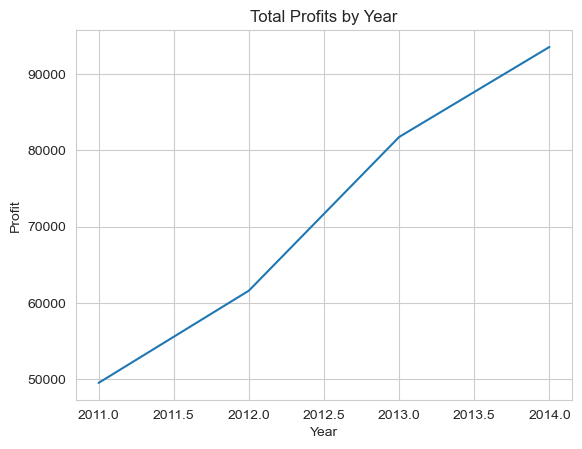

In [76]:
super_store["order_year"] = super_store["order_date"].dt.year
super_store.groupby("order_year")["profit"].sum().plot()
plt.xlabel("Year")
plt.ylabel("Profit")
plt.title("Total Profits by Year")
plt.show()

Features that Affect Sales & Profit


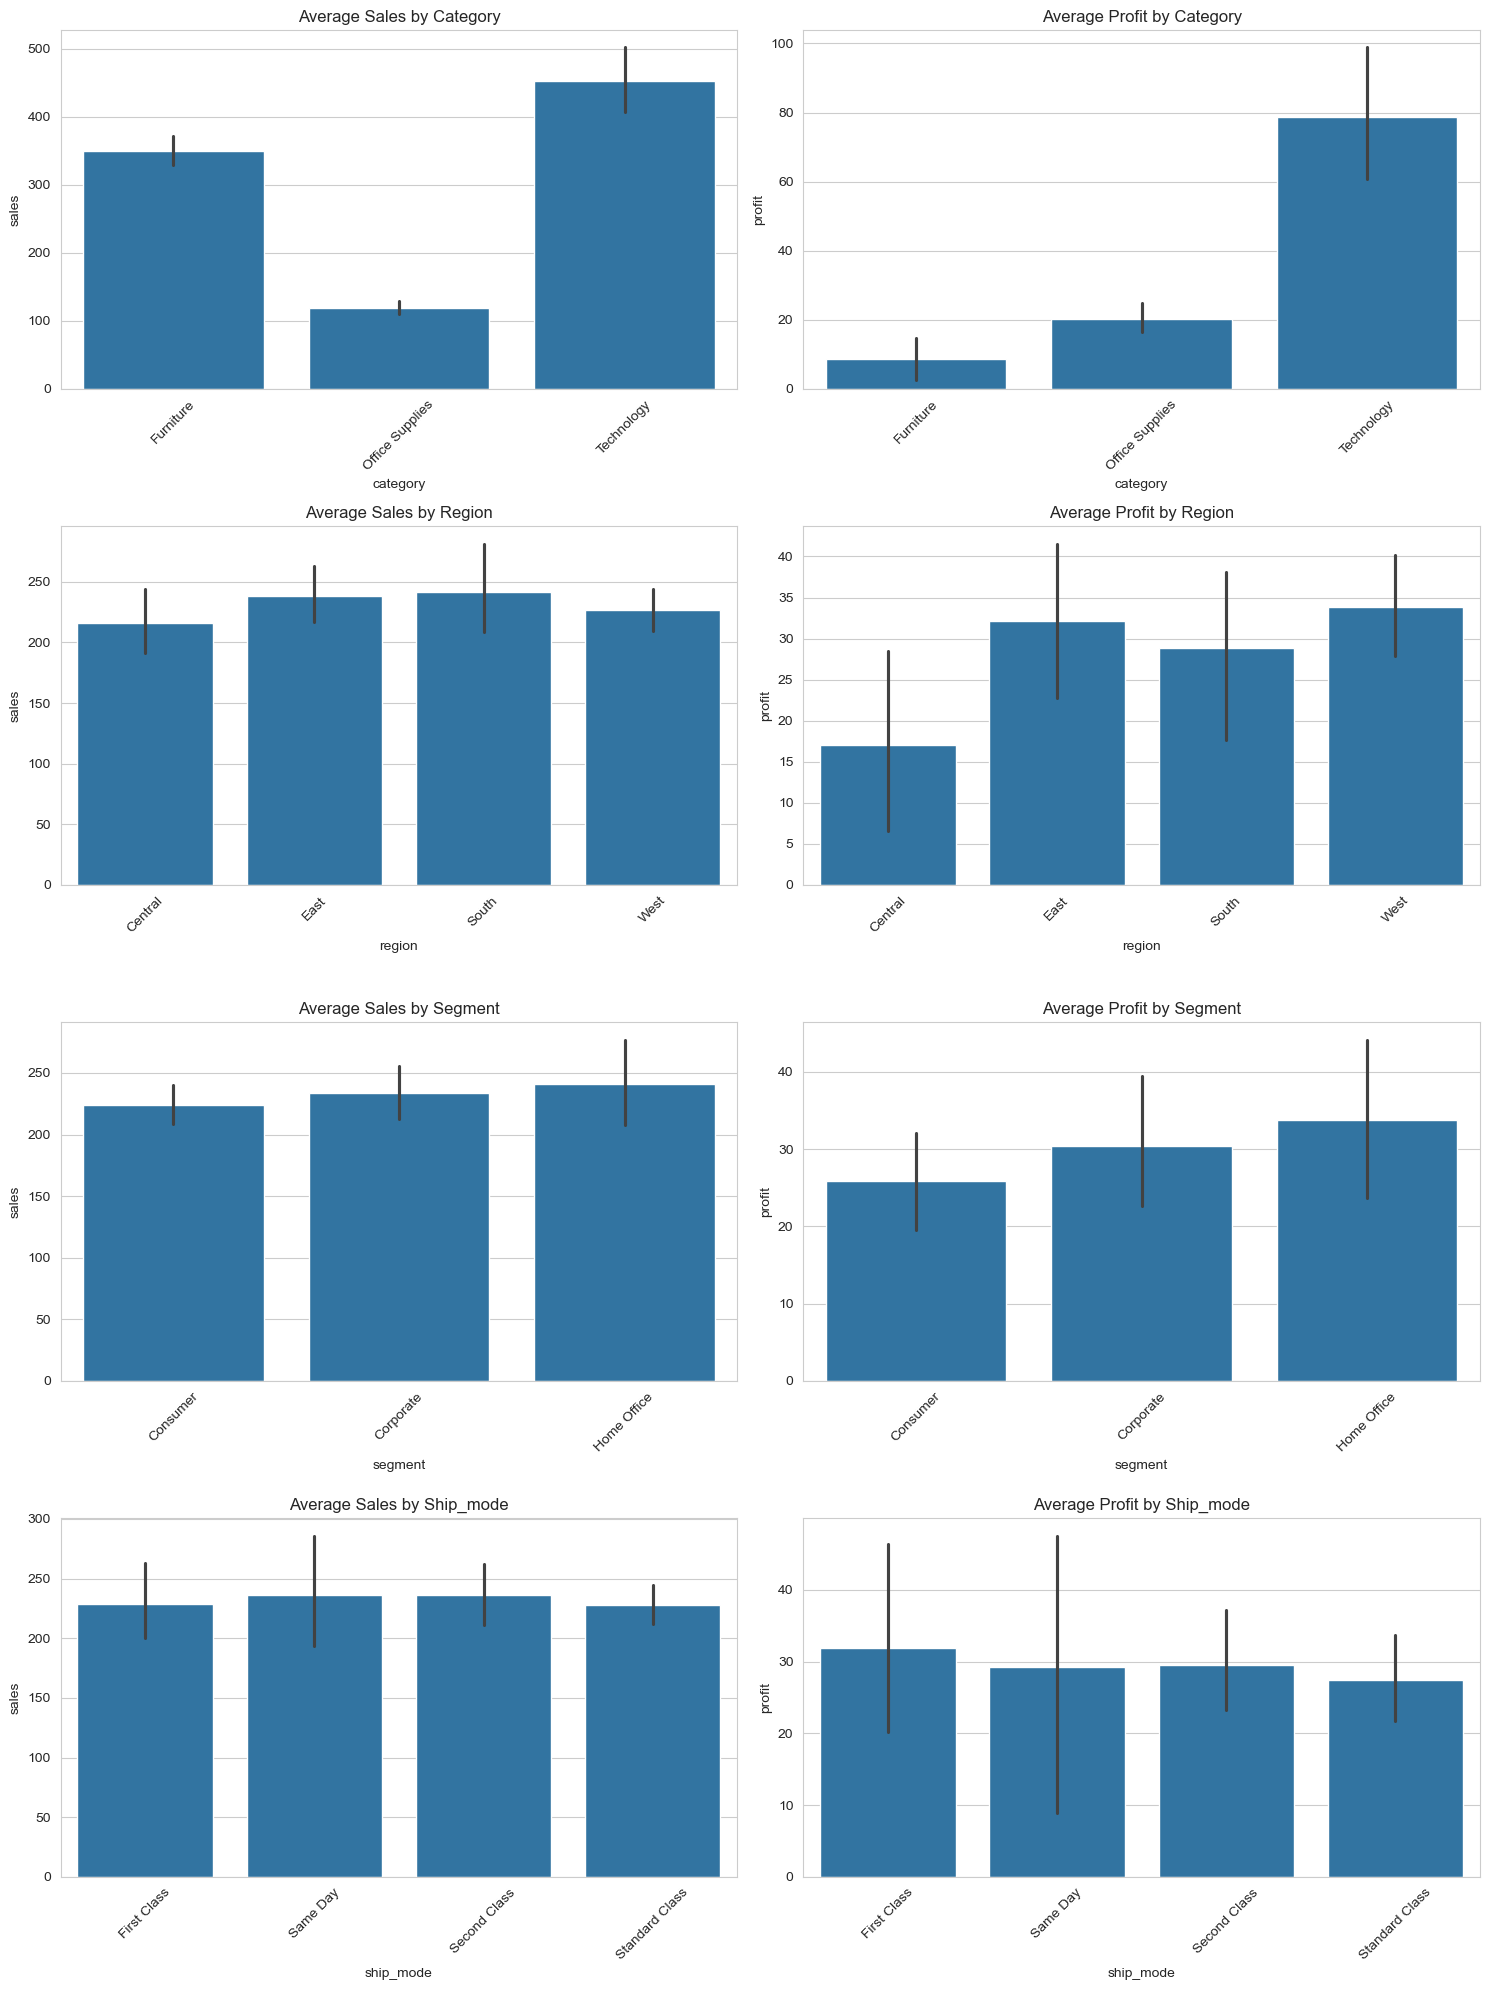

In [ ]:
features = ["category", "region", "segment", "ship_mode"]
fig, axes = plt.subplots(len(features), 2, figsize=(15, 20), sharey=False)

for i, feature in enumerate(features):
    # Sales subplot
    sns.barplot(
        data=super_store, x=feature, y="sales", ax=axes[i, 0], estimator=np.mean
    )
    axes[i, 0].set_title(f"Average Sales by {feature.capitalize()}")
    axes[i, 0].tick_params(axis="x", rotation=45)

    # Profit subplot
    sns.barplot(
        data=super_store, x=feature, y="profit", ax=axes[i, 1], estimator=np.mean
    )
    axes[i, 1].set_title(f"Average Profit by {feature.capitalize()}")
    axes[i, 1].tick_params(axis="x", rotation=45)

plt.tight_layout()
plt.show()

Sub-Category column shows strong relation between Sales & Profit


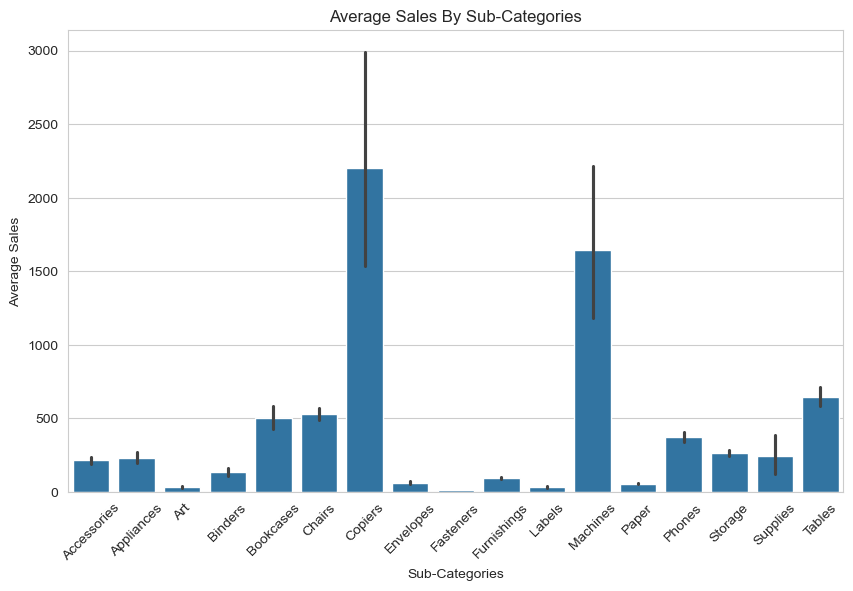

In [65]:
plt.figure(figsize=(10, 6))
sns.barplot(super_store, x="sub_category", y="sales")
plt.xticks(rotation=45)
plt.xlabel("Sub-Categories")
plt.ylabel("Average Sales")
plt.title("Average Sales By Sub-Categories")
plt.show()

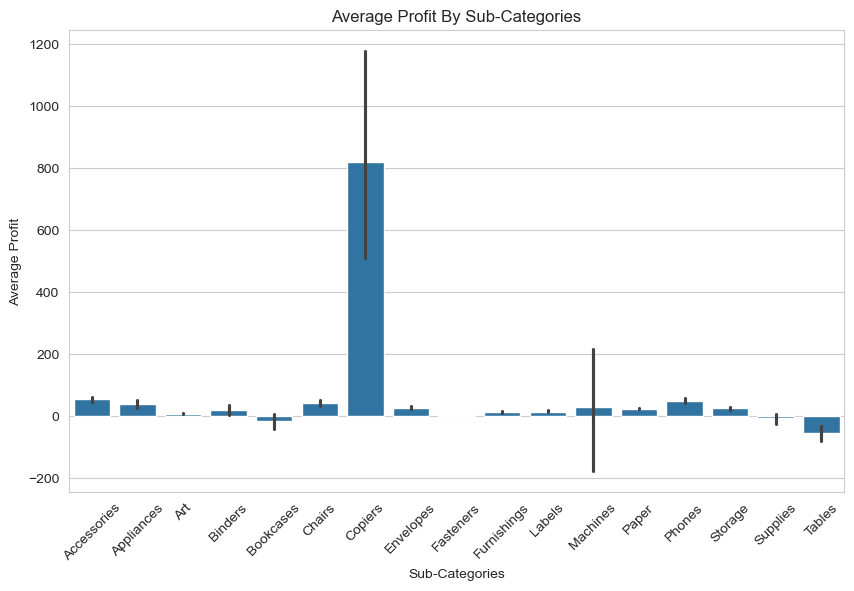

In [66]:
plt.figure(figsize=(10, 6))
sns.barplot(super_store, x="sub_category", y="profit")
plt.xticks(rotation=45)
plt.xlabel("Sub-Categories")
plt.ylabel("Average Profit")
plt.title("Average Profit By Sub-Categories")
plt.show()

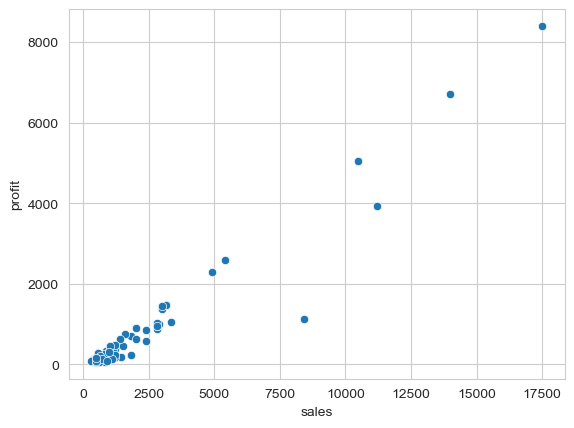

In [67]:
sns.scatterplot(
    super_store[super_store["sub_category"] == "Copiers"], x="sales", y="profit"
)
plt.show()

Relation between Sales & Profit is variable and independent on one vaiable


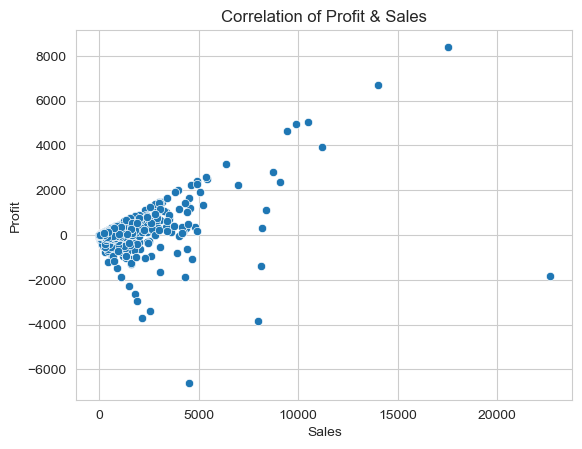

In [68]:
sns.scatterplot(super_store, x="sales", y="profit")
plt.xlabel("Sales")
plt.ylabel("Profit")
plt.title("Correlation of Profit & Sales")
plt.show()

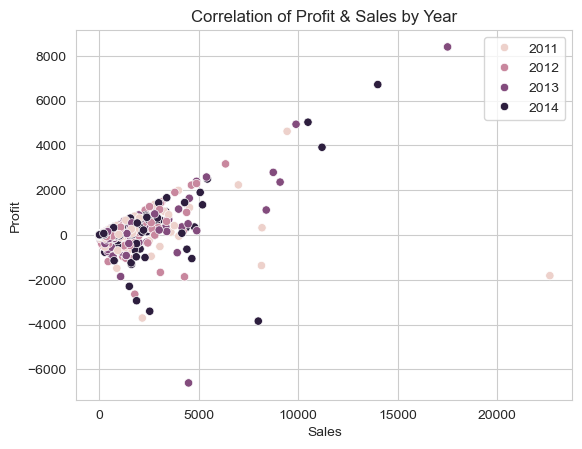

In [ ]:
sns.scatterplot(super_store, x="sales", y="profit", hue="order_year")
plt.xlabel("Sales")
plt.ylabel("Profit")
plt.title("Correlation of Profit & Sales by Year")
plt.legend()
plt.show()

Correlation Analysis: Heatmap Visualization


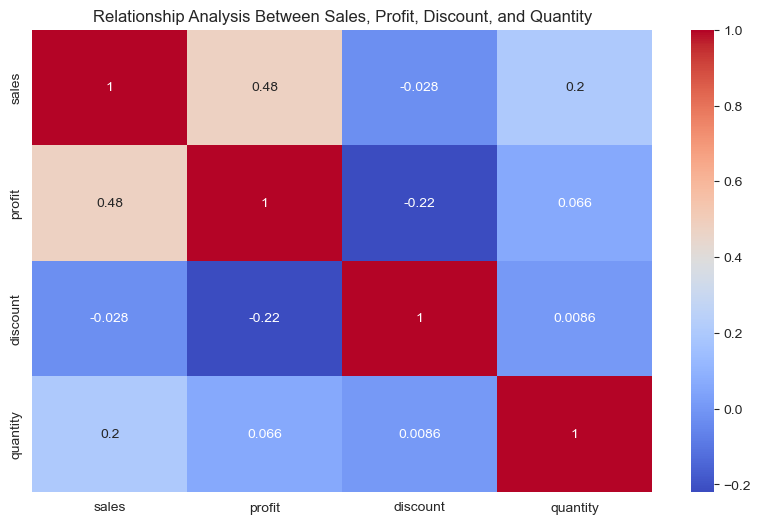

In [69]:
cor = super_store[["sales", "profit", "discount", "quantity"]].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(cor, cmap="coolwarm", annot=True)
plt.title("Relationship Analysis Between Sales, Profit, Discount, and Quantity")
plt.show()